In [1]:
import folium
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px
import cufflinks as cf
cf.go_offline(connected=True)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['font.family'] = 'Malgun Gothic'

# import matplotlib.font_manager as fm

# 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [4]:
df2_mf = pd.read_csv('2.광양시_재활용품분리수거_장려금지급내역(수정).csv')
incentive = [70, 40, 30, 150, 200, 600, 200, 300, 1000]

for i in range(len(incentive)):
    df2_mf.iloc[:, i+4] = df2_mf.iloc[:, i+4] / incentive[i]

# 각 아파트/동별로 그룹화 하여 평균을 냄.(단위: kg)
    
df2_apt = df2_mf[['emd_nm','glass', 'pet', 'plastic','lamp', 'vinyl', 'battery', 'carton', 'smallappliance', 'hp']].groupby(df2_mf['complex_nm']).mean().round(2)
df2_dong = df2_mf[['glass', 'pet', 'plastic','lamp', 'vinyl', 'battery', 'carton', 'smallappliance', 'hp']].groupby(df2_mf['emd_nm']).mean().round(2)


FileNotFoundError: ignored

In [ ]:
df2_dong['total'] = df2_dong.sum(axis = 1)
recycle_df = pd.DataFrame(df2_dong.sum())
recycle_df = recycle_df.drop(index = 'total')

# recycle_df=recycle_df.reset_index()
# recycle_df.columns=['recycle_nm', 'amount']
# recycle_df

## 항목별 폐기물 발생량 
- 어떤 항목의 재활용품이 주로 많이 발생하는지 확인
- 유리, 페트, 플라스틱이 가장 많이 배출되었으며, 기타 램프, 비닐, 배터리, 폐종이류는 적게 배출되었고, 소형 가전이나 휴대폰은 거의 배출되지 않았다.
- 이 중에서도 페트와 플라스틱이 가장 많이 발생.
- 캔류, 알루미늄은 장려금 교부대상에서 빠진 듯.

- 다른 배출품목에 비해 유리, 페트, 플라스틱이 정말 많이 나왔는데, 이걸 따로 봐야 할지 고민.

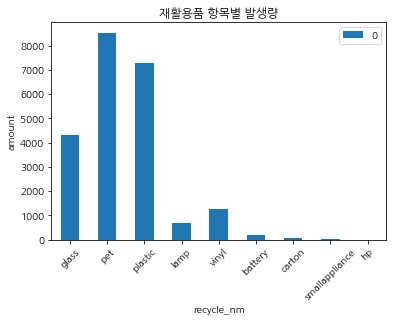

In [ ]:
recycle_df.plot(kind='bar', rot=45)
plt.title("재활용품 항목별 발생량")
plt.xlabel("recycle_nm")
plt.ylabel("amount")
plt.show()

In [ ]:
!pip install chart_studio

In [ ]:
!pip install cufflinks

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
# 데이터

df2_mf = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/2.광양시_재활용품분리수거_장려금지급내역(수정).csv')
incentive = [70, 40, 30, 150, 200, 600, 200, 300, 1000]

for i in range(len(incentive)):
    df2_mf.iloc[:, i+4] = df2_mf.iloc[:, i+4] / incentive[i]

# 각 아파트/동별로 그룹화 하여 평균을 냄.(단위: kg)
    
df2_apt = df2_mf[['emd_nm','glass', 'pet', 'plastic','lamp', 'vinyl', 'battery', 'carton', 'smallappliance', 'hp']].groupby(df2_mf['complex_nm']).mean().round(2)
df2_dong = df2_mf[['glass', 'pet', 'plastic','lamp', 'vinyl', 'battery', 'carton', 'smallappliance', 'hp']].groupby(df2_mf['emd_nm']).mean().round(2)

df2_dong['total'] = df2_dong.sum(axis = 1)
recycle_df = pd.DataFrame(df2_dong.sum())
recycle_df = recycle_df.drop(index = 'total')

In [11]:
# 코랩에서 plotly 보여지게하기

import numpy as np
import chart_studio
chart_studio.tools.set_credentials_file(username = 'username', api_key = 'api_key')


def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [12]:
recycle_df = recycle_df.rename(columns = {0 : 'Total'})
recycle_df

,Total
glass,4306.22
pet,8540.88
plastic,7265.31
lamp,667.38
vinyl,1256.59
battery,182.09
carton,56.28
smallappliance,13.96
hp,0.00


In [56]:
# Viz 1

configure_plotly_browser_state()

fig = px.bar(recycle_df, x = recycle_df.index, y = 'Total')
fig.update_layout(title = '재활용품 항목별 발생량')
fig.update_layout(xaxis_title = '재활용품 항목', title_x = 0.5, font_family = 'D2Coding', title_font_color = 'indigo', title_font_size = 25,
                  xaxis = dict(
                      tickfont = dict(
                          size = 17,
                          family = 'D2Coding'
                      )
                  ))

fig.show()

## 동별로 폐기물 발생 현황 비교.

- 각 동별로 폐기물 배출 현황은 어떻게 구성되어 있는지 비교
- 금호동만 과하게 높게 나오고, 봉강면, 옥곡면과 같이 일부 품목만 배출하는 지역의 경우에는 지표가 매우 낮게 나왔다
- 왜 이런 결과가 나왔는지 데이터를 살펴볼 필요가 있다
- '이상치'의 기준을 정해서, 데이터 수집이 잘 안 된 경우를 제거해 볼 수 있을 것


- 동별로 배출량이 너무 다른데, "발생량"과 "배출량"은 다르므로, 발생량을 예측해 볼 것인지, 그냥 배출량을 그대로 가져다 쓸 것인지 고민해야 할 듯
- 발생량 예측) 금호동의 배출량 통계가 완벽하게 데이터가 수집된 것이라고 가정하고, 금호동의 아파트 정보를 가지고 회귀모델을 만들어 다른 동에 적용
- 이유: 금호동 인구만 특별하게 높은 것이 아닌데, 다른 지역 배출량에 비해 금호동만 유독 배출량이 높음 > 이거는 금호동이 쓰레기를 많이 배출하는 것이 아니라, 다른 지역의 쓰레기 배출량이 제대로 집계가 안 되었다는 것이 맞다고 봐야 할 거 같음


- 배출량만 가지고 쓴다면) 금호동은 12개소를 따로 넣기로 하였으므로 아예 빼고 계산하고, 다른 지역들끼리 비교하여 입지선정

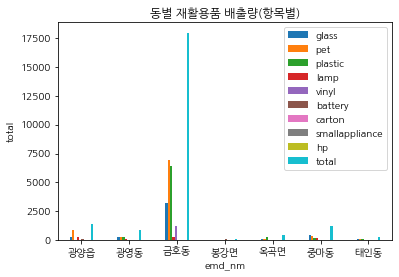

In [ ]:
df2_dong.plot(kind='bar', rot=0)
plt.title("동별 재활용품 배출량(항목별)")
plt.xlabel("emd_nm")
plt.ylabel("total")
plt.show()

In [35]:
df2_dong

,glass,pet,plastic,lamp,vinyl,battery,carton,smallappliance,hp,total
emd_nm,,,,,,,,,,
광양읍,222.07,836.55,27.71,224.68,0.00,38.21,18.65,3.32,0.0,1371.19
광영동,263.95,259.75,254.18,64.83,34.07,0.00,17.88,0.00,0.0,894.66
금호동,3163.02,6956.74,6418.84,217.91,1197.91,20.70,0.00,0.00,0.0,17975.12
봉강면,0.00,0.00,0.00,0.00,0.00,120.00,0.00,0.00,0.0,120.00
옥곡면,120.00,44.00,290.00,0.00,0.00,0.00,0.00,0.00,0.0,454.00
중마동,444.19,377.83,199.30,134.59,14.26,2.57,6.97,10.64,0.0,1190.35
태인동,92.99,66.01,75.28,25.37,10.35,0.61,12.78,0.00,0.0,283.39


In [53]:
# Viz 2

## 필요 Module
import plotly.graph_objects as go
configure_plotly_browser_state()


fig = go.Figure()
fig.add_trace(go.Bar(name="glass", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[222.07, 263.95, 120.00, 444.19, 92.99]))
fig.add_trace(go.Bar(name="pet", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[836.55, 259.75, 44.00, 377.83, 66.01]))
fig.add_trace(go.Bar(name="plastic", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[27.71, 254.18, 290.00, 199.30, 75.28]))
fig.add_trace(go.Bar(name="lamp", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[224.68, 64.83, 0.00, 134.59, 25.37]))
fig.add_trace(go.Bar(name="vinyl", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[0.00, 34.07, 0.00, 14.26, 10.35]))
fig.add_trace(go.Bar(name="battery", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[38.21, 0.00, 0.00, 2.57, 0.61]))
fig.add_trace(go.Bar(name="carton", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[18.65, 17.88, 0.00, 6.97, 12.78]))
fig.add_trace(go.Bar(name="smallappliance", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[3.32, 0.00, 0.00, 10.64, 0.00]))
fig.add_trace(go.Bar(name="hp", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[0.00, 0.00, 0.00, 0.00, 0.00,]))
fig.add_trace(go.Bar(name="total", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[1371.19, 894.66, 454.00, 1190.35, 283.39]))


fig.update_layout(title = '동별 재활용품 배출량(항목별)', title_x = 0.5, 
                  font_family = 'D2Coding', title_font_color = 'indigo', title_font_size = 25)

fig.show()

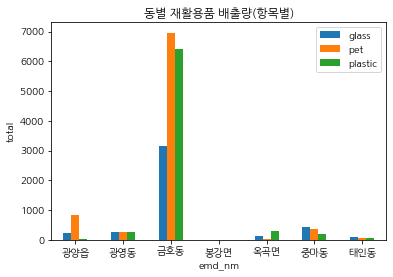

In [ ]:
df2_dong[['glass', 'pet', 'plastic']].plot(kind='bar', rot=0)
plt.title("동별 재활용품 배출량(항목별)")
plt.xlabel("emd_nm")
plt.ylabel("total")
plt.show()

In [57]:
import plotly.graph_objects as go


configure_plotly_browser_state()


fig = go.Figure()
fig.add_trace(go.Bar(name="glass", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[222.07, 263.95, 120.00, 444.19, 92.99]))
fig.add_trace(go.Bar(name="pet", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[836.55, 259.75, 44.00, 377.83, 66.01]))
fig.add_trace(go.Bar(name="plastic", x=["광양읍", "광영동", "옥곡면", "중마동", "태인동"], 
                     y=[27.71, 254.18, 290.00, 199.30, 75.28]))

fig.update_layout(title = '동별 재활용품 배출량(항목별)', title_x = 0.5, 
                  font_family = 'D2Coding', title_font_color = 'indigo', title_font_size = 25,
                  xaxis = dict(
                      tickfont = dict(
                          size = 20
                      )
                  ))

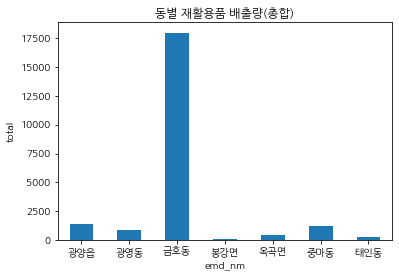

In [ ]:
df2_dong['total'].plot(kind='bar', rot=0)
plt.title("동별 재활용품 배출량(총합)")
plt.xlabel("emd_nm")
plt.ylabel("total")
plt.show()

## 아파트별 배출량통계 확인.
- 특정 항목만을 배출한 주거단지 => 제외.
- 근거: Q&A 에 따르면, "모든 수거항목"을 골고루 수거하는 곳이 목적이므로, 일부 1~2품목 위주로만 쓰레기가 발생한 곳은 제외하는 것이 맞을듯.
- 주거단지 내에 설치되어야 하므로, 학교나 기타 단체는 제외.
=> 내 생각엔, 1인 쓰레기 발생량이 크게 차이가 없다는 가정 하에, 배출량 상위 20개 아파트의 값을 기준으로 회귀를 돌린 다음 나머지 하위 40개는 예측을 해서 넣는 것이 맞는 것 같음.((상위 20, 하위 40의 기준은 없음. 자세한 기준이 더 정해지면 좋을것.))

In [16]:
pd.set_option('display.max_rows', 100)
df2_apt['total'] = df2_apt.sum(axis = 1)
df2_apt.sort_values(by = ['total'], ascending = False, inplace = True)

In [ ]:
plt.figure(figsize = (20, 10))
df2_apt['total'].plot(kind='bar', rot=90)
plt.title("아파트별 재활용품 배출량(총합)")
plt.xlabel("emd_nm")
plt.ylabel("total")
plt.show()

In [22]:
df2_apt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 광양제철주택관리소 to 상봉마을회
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   glass           70 non-null     float64
 1   pet             70 non-null     float64
 2   plastic         70 non-null     float64
 3   lamp            70 non-null     float64
 4   vinyl           70 non-null     float64
 5   battery         70 non-null     float64
 6   carton          70 non-null     float64
 7   smallappliance  70 non-null     float64
 8   hp              70 non-null     float64
 9   total           70 non-null     float64
dtypes: float64(10)
memory usage: 8.5+ KB


In [35]:
configure_plotly_browser_state()


fig = px.bar(df2_apt, x = df2_apt.index, y = 'total')

fig.update_layout(title = '아파트별 재활용품 배출량(총합)', title_x = 0.5, 
                  font_family = 'D2Coding', title_font_color = 'indigo', title_font_size = 25, yaxis_title = '총합', xaxis_title = "")
fig.update_xaxes(tickangle=45)
fig.show()

## 추가적으로 생각해 볼 사항.
- 어떤 재활용품을 주로 보면 좋을지도 근거가 있으면 좋을 듯. 모든 재활용품을 다 수거하는 로봇의 설치가 목적이라고 했지만, 그 중에서도 중요하게 수거되어야 하는 항목이 존재할 것임. 그거 근거를 찾아 보기.

- 찾아서, 가중치를 줄 수 있을듯.

## DF3 Viz

In [41]:
# Data / Preprocessing

df3 = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/3.광양시_금호동_집적장별_재할용품통계(수정).csv')
df3_sum = pd.DataFrame(df3.groupby('apt_nm')['can', 'plastic', 'glass', 'paper', 'scrapmetal'].sum()).reset_index()
df3_sum['total'] = df3_sum['can'] + df3_sum['plastic'] + df3_sum['glass'] + df3_sum['paper'] + df3_sum['scrapmetal']
df3_sum

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,apt_nm,can,plastic,glass,paper,scrapmetal,total
0,동백아파트,4.7,21.9,3.1,0.5,3.6,33.8
1,매화아파트,10.5,47.4,6.6,1.0,7.7,73.2
2,목련빌라,11.7,53.3,7.4,1.2,8.6,82.2
3,목련연립아파트,4.3,19.5,2.8,0.6,3.3,30.5
4,백합아파트,12.6,56.4,7.9,1.3,9.5,87.7
5,사랑아파트,20.6,91.7,12.8,1.9,15.2,142.2
6,송죽아파트,0.5,2.3,0.4,0.0,0.4,3.6
7,장미아파트,6.8,30.4,4.2,0.7,5.1,47.2
8,장미연립아파트,1.1,4.9,0.7,0.1,0.8,7.6
9,초원아파트,7.8,35.0,4.8,0.8,5.8,54.2


In [58]:
# Viz 1

configure_plotly_browser_state()


fig = go.Figure()
fig.add_trace(go.Bar(name="can", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[4.7, 10.5, 11.7, 4.3, 12.6, 20.6, 0.5, 6.8, 1.1, 7.8]))
fig.add_trace(go.Bar(name="plastic", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[21.9, 47.4, 53.3, 19.5, 56.4, 91.7, 2.3, 30.4, 4.9, 35.0]))
fig.add_trace(go.Bar(name="glass", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[3.1, 6.6, 7.4, 2.8, 7.9, 12.8, 0.4, 4.2, 0.7, 4.8]))
fig.add_trace(go.Bar(name="paper", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[0.5, 1.0, 1.2, 0.6, 1.3, 1.9, 0.0, 0.7, 0.1, 0.8]))
fig.add_trace(go.Bar(name="scrapmetal", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[3.6, 7.7, 8.6, 3.3, 9.5, 15.2, 0.4, 5.1, 0.8, 5.8]))
fig.add_trace(go.Bar(name="total", x=["동백아파트", "매화아파트", "목련빌라", "목련연립아파트", "백합아파트", "사랑아파트", "송죽아파트", "장미아파트", "장미연립아파트", "초원아파트"], 
                     y=[33.8, 73.2, 82.2, 30.5, 87.7, 142.2, 3.6, 47.2, 7.6, 54.2]))


fig.update_layout(title = '금호동 아파트별 폐기물 발생량', title_x = 0.5, 
                  font_family = 'D2Coding', title_font_color = 'indigo', title_font_size = 25,
                  xaxis = dict(
                      tickfont = dict(
                          size = 15
                      )
                  ))

In [52]:
# Viz 2

configure_plotly_browser_state()

fig = px.bar(df3_sum, x = 'apt_nm', y = 'total')
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis_title = '',
    yaxis_title = '총량',
    title = '금호동 아파트별 재활용품 총량',
    title_x = 0.5,
    font_family = 'D2Coding',
    title_font_size = 25,
    title_font_color = '#03254c'
)

fig.show()